In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
1,807 cases (7 day average) as of Sat 01 May, -11.9 since Fri 30 Apr
91 hospitalised (7 day average) as of Mon 03 May, -1.6 since Sun 02 May
9 died (7 day average) as of Sat 01 May, +0.1 since Fri 30 Apr


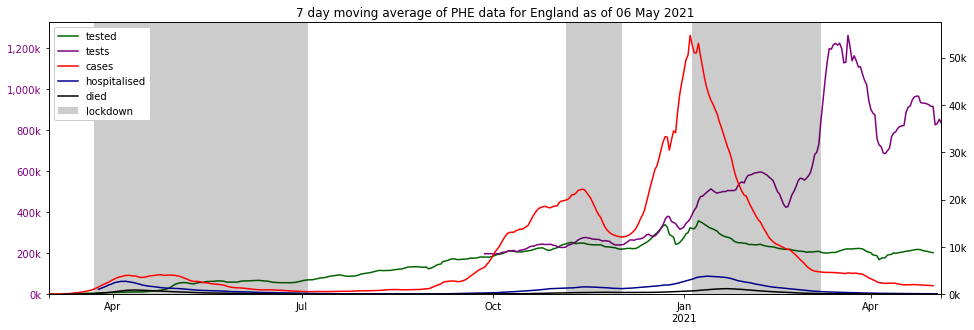

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

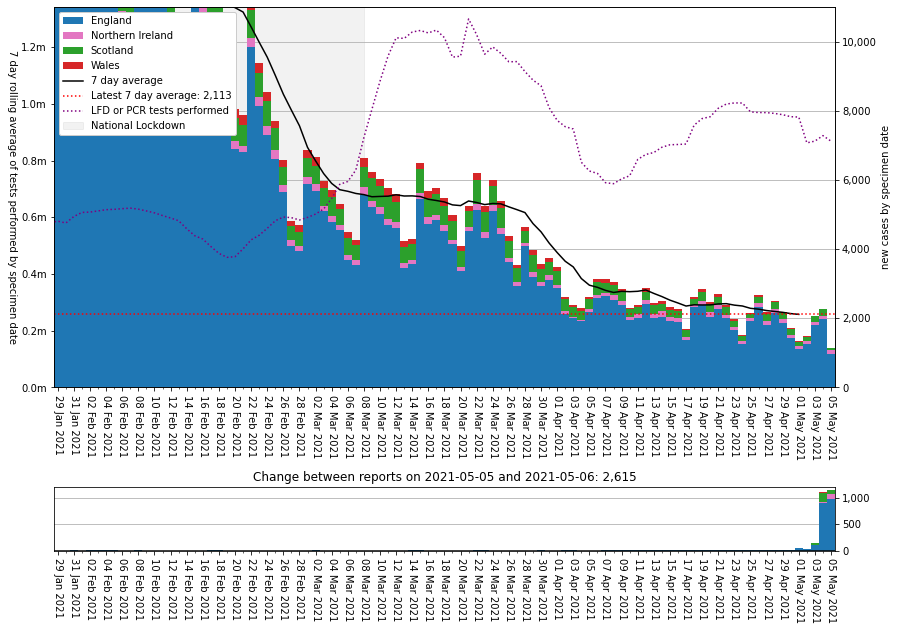

In [4]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

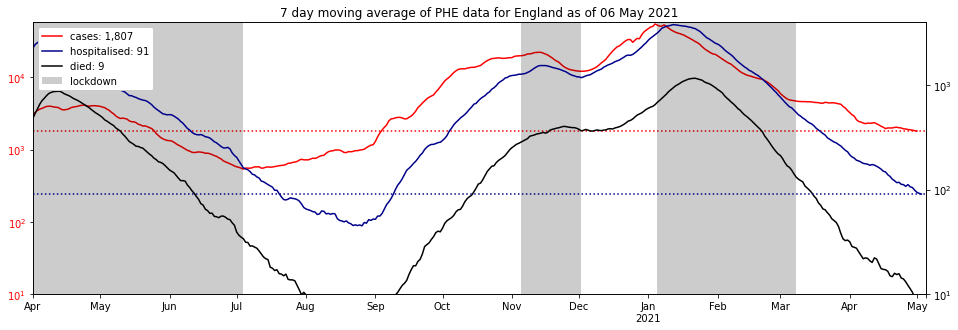

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

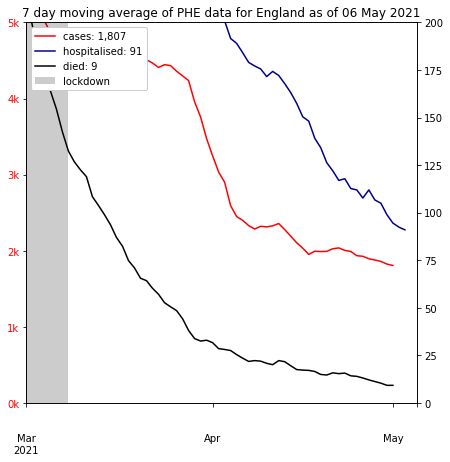

In [6]:
plot_summary(earliest_date='2021-03-01', show_latest=True, figsize=(7, 7),
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=5_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=200)

In [7]:
vaccination_changes()

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,13632735.0,29232101.0,15599366.0,56286961,24.220059,27.713996,48.065946
1,Northern Ireland,N92000002,459763.0,957063.0,497300.0,1893667,24.278978,26.261217,49.459805
2,Scotland,S92000003,1400296.0,2860635.0,1460339.0,5463300,25.630956,26.729980,47.639064
3,Wales,W92000004,798925.0,1884372.0,1085447.0,3152879,25.339539,34.427170,40.233292


'partial: 34,934,171 (52.3%), full: 16,291,719'

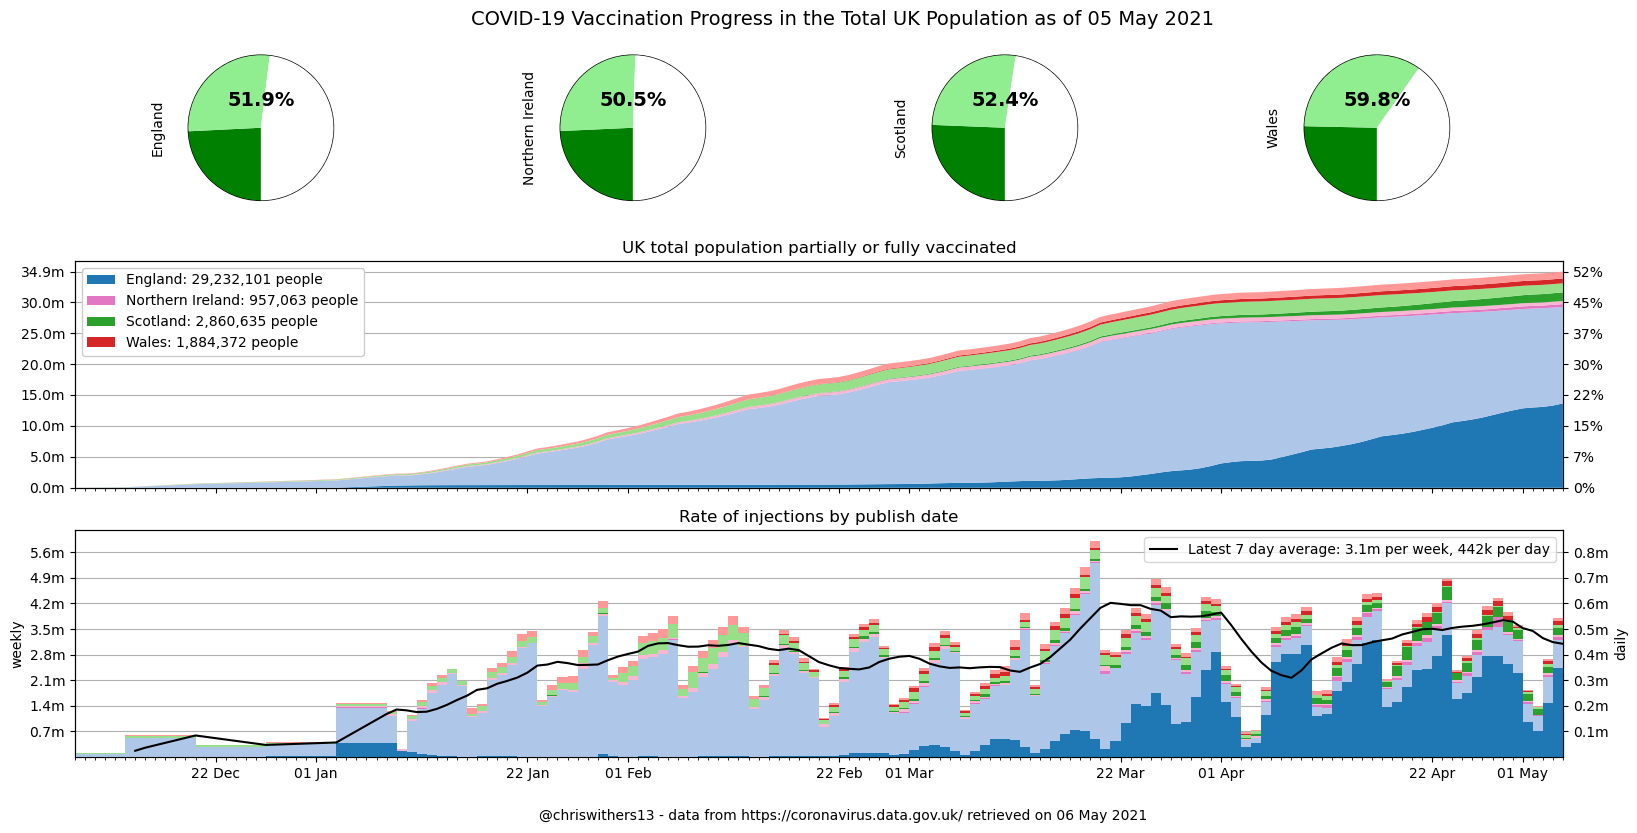

In [8]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

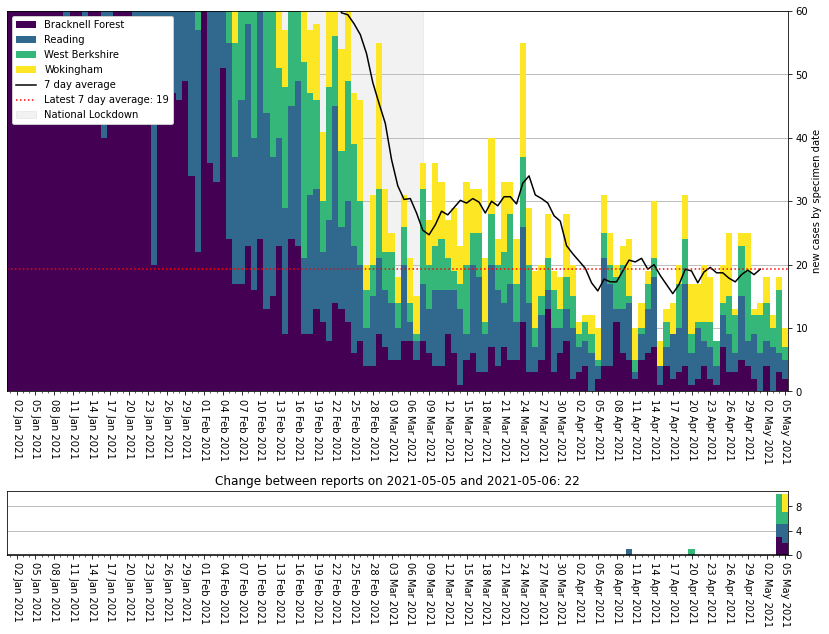

In [9]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=60)

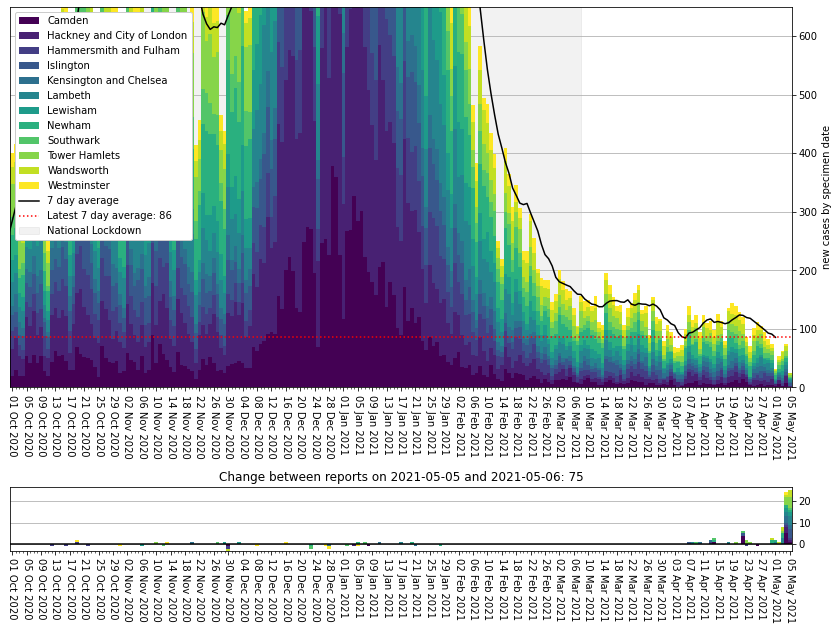

In [10]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000036,Erewash,122.214421,141.0,2021-05-05
E08000001,Bolton,95.287776,274.0,2021-05-05
N09000005,Derry City and Strabane,93.863198,142.0,2021-05-05
S12000020,Moray,85.577124,82.0,2021-05-05
E07000120,Hyndburn,71.566946,58.0,2021-05-05
E06000008,Blackburn with Darwen,56.113724,84.0,2021-05-05
E06000013,North Lincolnshire,54.558540,94.0,2021-05-05
E08000016,Barnsley,53.065226,131.0,2021-05-05
N09000001,Antrim and Newtownabbey,49.475973,71.0,2021-05-05


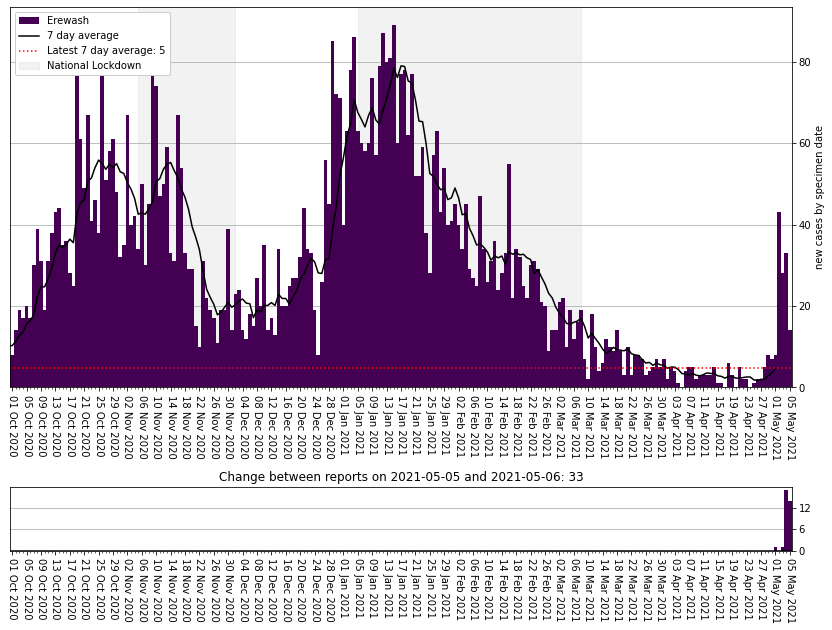

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,39.967774,317.0,2021-05-05
E08000001,Bolton,95.287776,274.0,2021-05-05
E08000019,Sheffield,40.352020,236.0,2021-05-05
E08000032,Bradford,39.460813,213.0,2021-05-05
E08000034,Kirklees,48.205154,212.0,2021-05-05
S12000049,Glasgow City,29.062421,184.0,2021-05-05
E08000036,Wakefield,48.806817,170.0,2021-05-05
E08000025,Birmingham,14.363085,164.0,2021-05-05
E08000003,Manchester,29.483158,163.0,2021-05-05


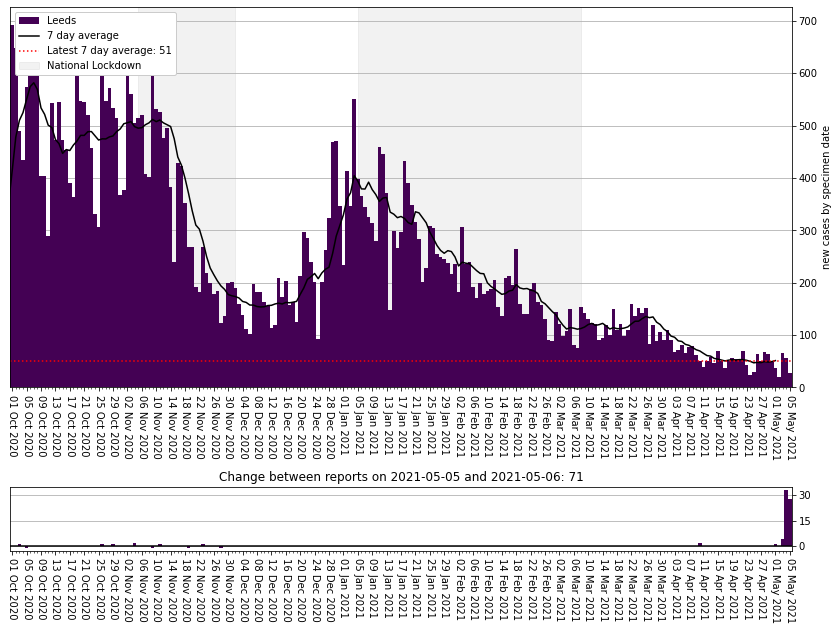

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.3
phe_max = 0.15

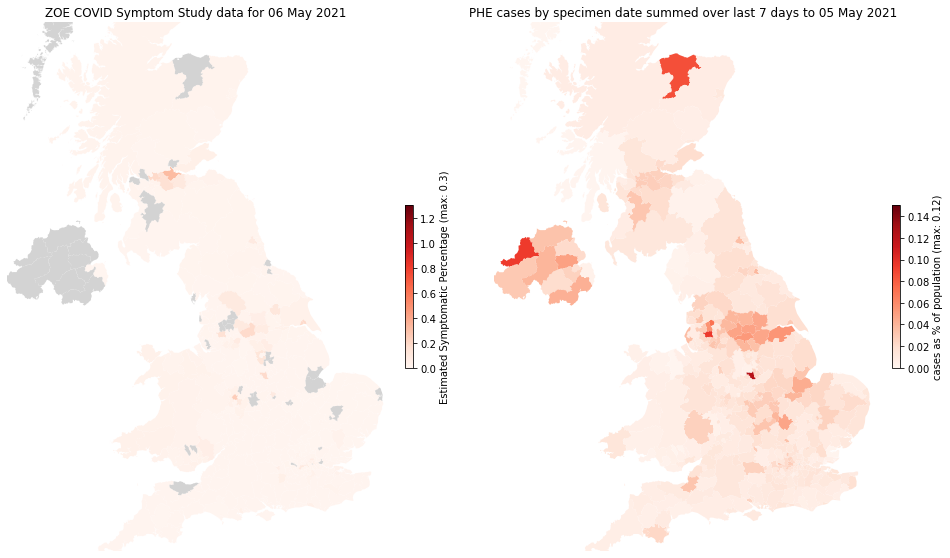

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...